<style>
    h1 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 24px; /* Increase font size for headings */
        font-weight: bold; /* Make headings bold */
    }

    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h1>Home Work-1 Computing Q2</h1>

<p>First, we will perform the required imports.</p>


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part A</h2>
<h3>Function Definitions</h3>


<p>Present Image.</p>




In [ ]:
def present_image(img, title, xlabel = '', ylabel = ''):
  # convert each of the RGB chnnels to the correct dynamic range:
  img = (((img-np.min(img))/np.max(img))* 255).astype(int);
  # Plot:
  plt.figure(figsize=(16,8));
  plt.imshow(img, cmap="gray");
  plt.title(title);
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show();
  
def compare_images(img1,img2, **args):
  # convert each of the RGB chnnels to the correct dynamic range:
  img1 = (((img1-np.min(img1))/np.max(img1))* 255).astype(int);
  img2 = (((img2-np.min(img2))/np.max(img2))* 255).astype(int);
  # Plot:
  plt.figure(figsize=(16,8))
  plt.subplot(121);
  plt.imshow(img1, cmap="gray")
  plt.title(args['title1'])
  plt.xlabel(args['xlabel1'])
  plt.ylabel(args['ylabel1'])
  plt.subplot(122)
  plt.imshow(abs(img2), cmap="gray")
  plt.title(args['title2'])
  plt.xlabel(args['xlabel2'])
  plt.ylabel(args['ylabel2'])
  plt.savefig(args['saveSrc'])
  plt.show()


<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p><strong>Next</strong>, is a function that translates the amplitude of an image to a logarithmic scale. For any pixel with a magnitude of <span style="font-style: italic;">x</span>, we will convert using <span style="font-family: 'Times New Roman', Times, serif;">log<sub>10</sub>(x+1)</span>. Since we expect the Fourier transform to output complex values, we will use <code>abs()</code> to calculate the magnitude.</p>
</div>


In [ ]:
def logarithmic_display_of_image(img):
  return np.log10(np.abs(img)+1)

<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p>Displaying image and the <strong>Uma.jpg</strong> FFT shifted log magnitude of amplitude.</p>
</div>


In [ ]:
# Load image in a gray scale format
I1 = cv2.imread('./imgs/Uma.jpg', cv2.IMREAD_GRAYSCALE)

# Perfrom the Furier tranform and shift the result
I1_f = np.fft.fft2(I1);
fshift = np.fft.fftshift(I1_f);
# Convert to log scale and present the output
log_image = logarithmic_display_of_image(fshift);

compare_images(I1,log_image, title1='Orginal', 
                title2='Uma.jpg shifted log magnitude of amplitude',
                xlabel1='size', ylabel1='size',
                xlabel2='u',
                ylabel2='v',
                saveSrc='./frequency_in_images/outPut.jpg');

<!DOCTYPE html>
<html>
<head>
    <title>Styled Image</title>
    <style>
        /* Define the styles for the image */
        .styled-image {
            width: 700px; /* Set the width */
            height: auto; /* Maintain aspect ratio */
            border: 2px solid #ccc; /* Add a border */
            border-radius: 10px; /* Add rounded corners */
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); /* Add a shadow */
        }
    </style>
</head>
<body>
    <!-- Place your image here with the 'styled-image' class -->
    <img src="../frequency_in_images/outPut.jpg" alt="Styled Image" class="styled-image">
</body>
</html>


<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part B</h2>





<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p>Select the 5% lowest frequencies of the image in the <em>x</em>-direction (with all their frequencies in the <em>y</em>-direction) and the 5% lowest frequencies of the image in the <em>y</em>-direction (with all their frequencies in the <em>x</em>-direction). The different frequencies other than zero should be in the form of a "band" in both axes, as shown in the illustration (after fftshift).</p>
</div>


<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p>Partition the x-axis and y-axis of the Fourier transform
       Shift back and do the IFFT
       Plot the frequency of the Partition and with output_image_fft_shift</p>
</div>


In [ ]:
# Create an output image initialized with zeros
binarymask = np.zeros(I1_f.shape)
R,C = binarymask.shape
binarymask[ int(0.45 * R) :  int( 0.55 * R), : ] = 1 
# present_image(binarymask)
binarymask[ : , int( 0.45 * C) : int( 0.55 * C)] = 1 
# present_image(binarymask)
outPut = fshift * binarymask 

output_image_fft_shift = np.fft.ifftshift(outPut)

output_image_restores= np.fft.ifft2(output_image_fft_shift)


# # Plot the original image and the transformed image
compare_images(logarithmic_display_of_image(outPut), output_image_restores, 
                title1='5% lowest frequencies of the image in the x and y axis', 
                title2='Inverse Fourier Transformed of 5% lowest frequencies of the image in the x and y axis',
                xlabel1='Width', ylabel1='Height',
                xlabel2='Frequency (u)', ylabel2='Frequency (v)',
                saveSrc='./outPut2.jpg',
                save=True)





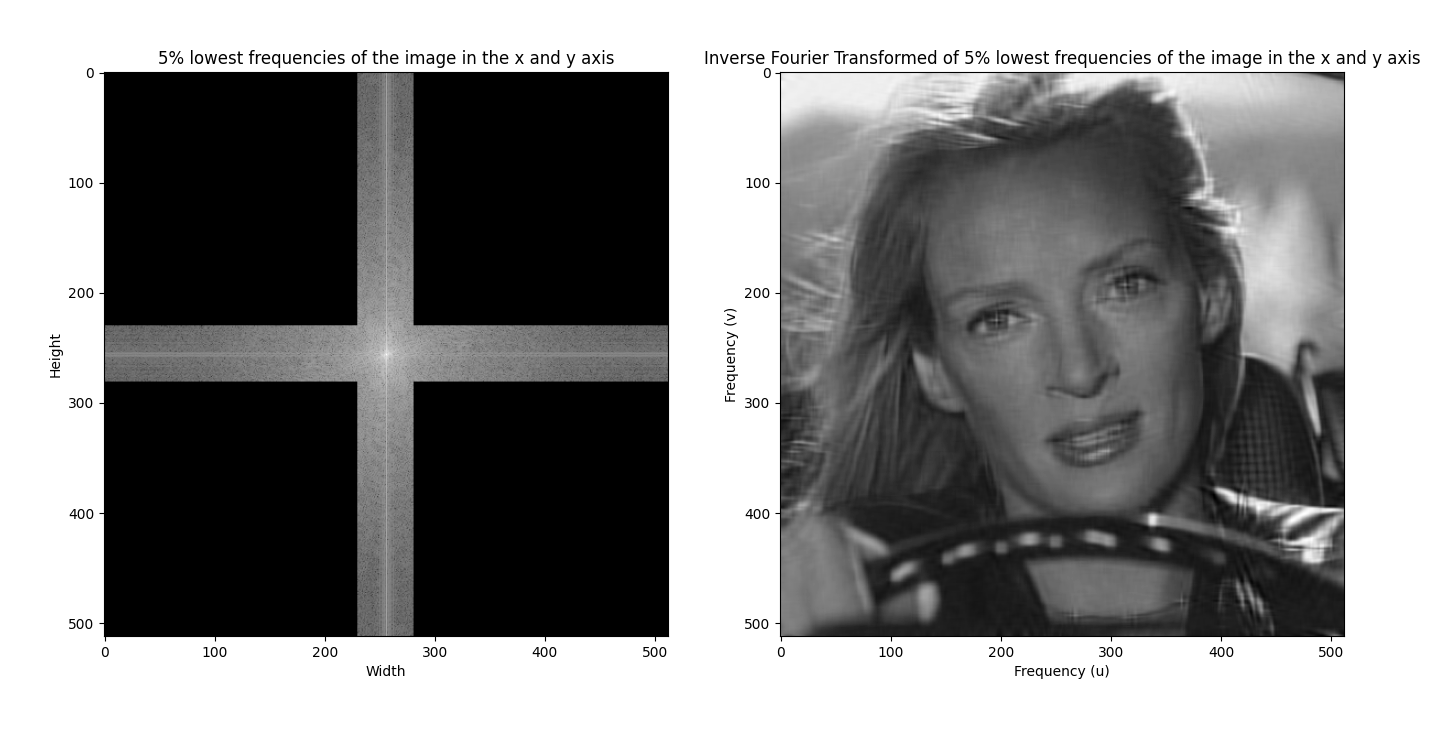

<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part C D E</h2>
<p>Summarize the values ​​in the columns and in the rows of the conversion amplification. Using the sort function, find the positions of the top 5% dominant columns - those in which the sum of the values ​​is highest.</p>





In [ ]:
# Calculate sum of x-axis and y-axis of the Fourier transform
sum_x_axis = np.sum(I1_f, axis=0)
sum_y_axis = np.sum(I1_f, axis=1)

# Sort the array while remembering the index of the original array
sorted_indices_x= sorted(range(len(sum_x_axis)), key=lambda i: sum_x_axis[i])
sorted_indices_y= sorted(range(len(sum_y_axis)), key=lambda i: sum_y_axis[i])

highest_five_percent_sum_amplitude_x_axis_indices =  sorted_indices_x[int(np.ceil(len(sum_x_axis) * 0.95)):]
highest_five_percent_sum_amplitude_y_axis_indices =  sorted_indices_y[int(np.ceil(len(sum_y_axis) * 0.95)):]

mask = np.zeros(I1.shape)
for x in highest_five_percent_sum_amplitude_x_axis_indices:
  mask[x,:] = 1

for y in highest_five_percent_sum_amplitude_y_axis_indices:
  mask[:,y] = 1


present_image(mask)


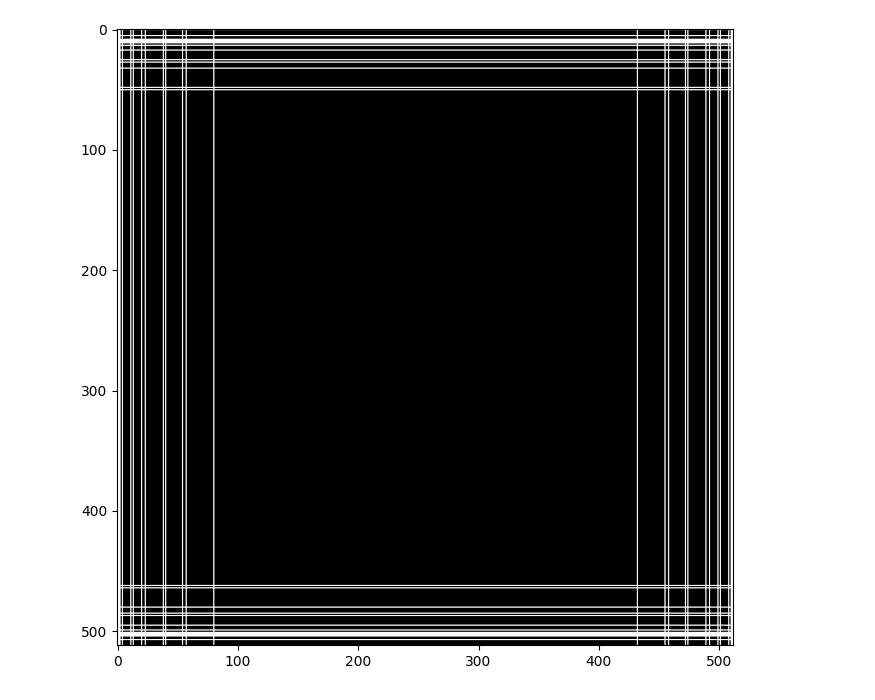

In [ ]:
outPut = fshift * mask 


output_image_fft_shift = np.fft.ifftshift(outPut)

output_image_restores= np.fft.ifft2(output_image_fft_shift)





compare_images(logarithmic_display_of_image(outPut), output_image_restores, 
                title1='5% highest five percent sum amplitude x and y axis', 
                title2='Image restored',
                xlabel1='Width', ylabel1='Height',
                xlabel2='Frequency (u)', ylabel2='Frequency (v)',
                saveSrc='./outPut2.jpg',
                save=True)

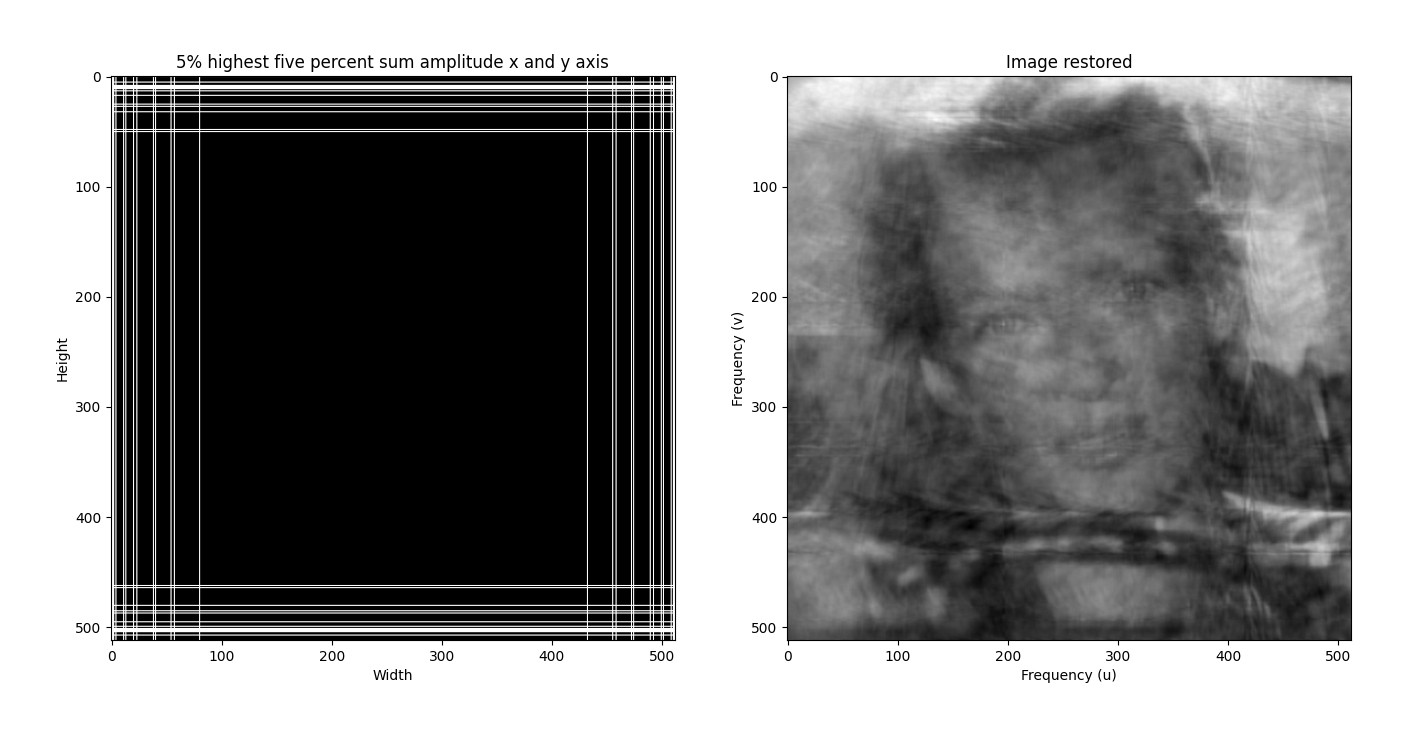

<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part F</h2>







In [ ]:
# Flatten the image to a 1D array
flattened_image = I1_f.flatten()

# Sort the pixel values
sorted_pixels = np.sort(flattened_image)

top_10_percent_freq_values = sorted_pixels[int(np.ceil(len(sorted_pixels) * 0.9)):]

binarymask = np.zeros(I1_f.shape)


for x in range(0, I1_f.shape[0]):
  for y in range(0, I1_f.shape[1]):
    if I1_f[x,y] >= top_10_percent_freq_values[0] :
      binarymask[x,y] = 1


outPut = fshift * np.fft.ifftshift(binarymask) 

output_image_restores= np.fft.ifft2(np.fft.ifftshift(outPut))


# # Plot the original image and the transformed image
compare_images(logarithmic_display_of_image(outPut), output_image_restores, 
                title1='10% dominant bidimensional frequencies of the image', 
                title2='restored image',
                xlabel1='Width', ylabel1='Height',
                xlabel2='Frequency (u)', ylabel2='Frequency (v)',
                saveSrc='./outPut2.jpg',
                save=True)



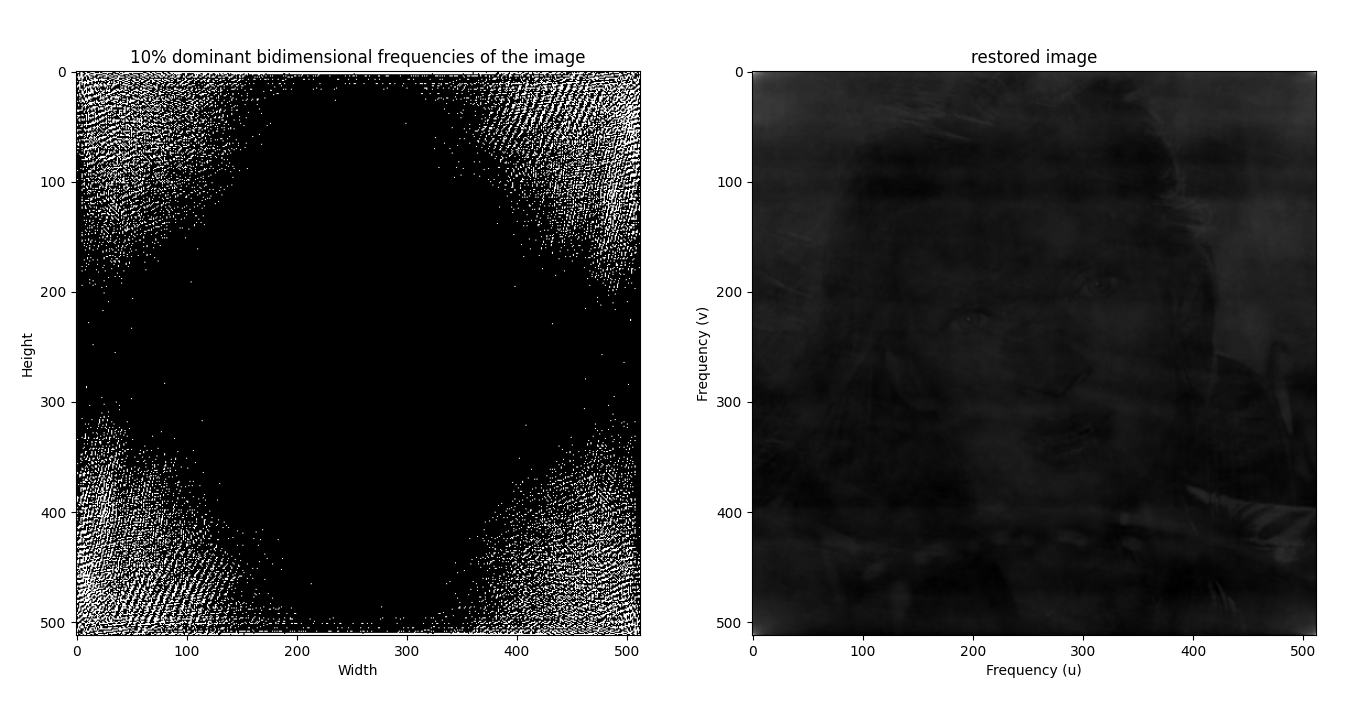